In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import scipy.ndimage as ndi
import os

(800, 800, 3)


(-0.5, 799.5, 799.5, -0.5)

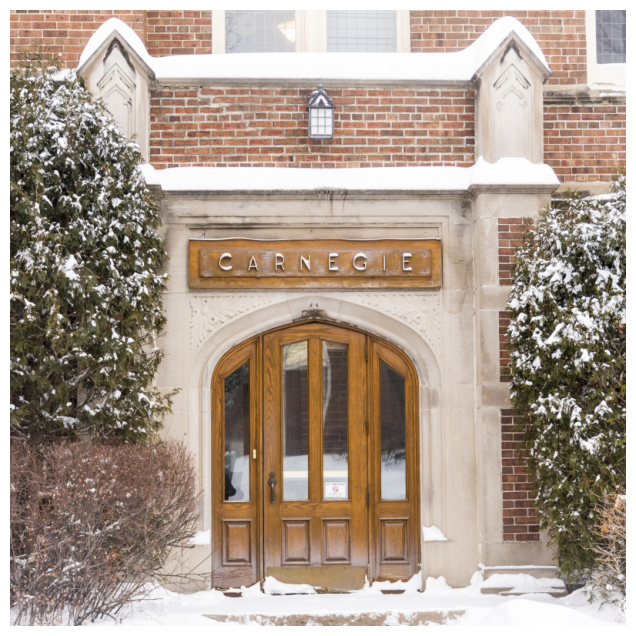

In [15]:
image = io.imread(r'..\data\carnegie.jpg')
print(image.shape)
fig = plt.figure(figsize=[8,8])
plt.imshow(image)
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

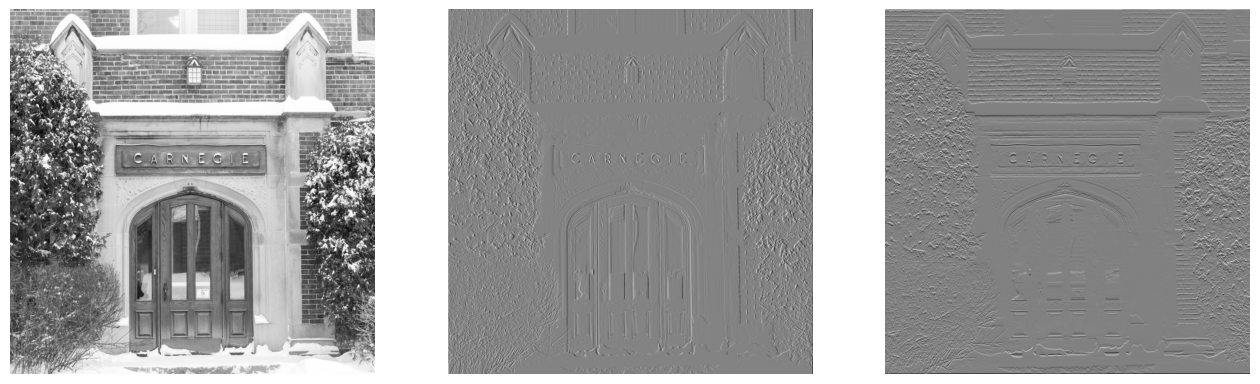

In [16]:
#Horizontal and Vertical Gradients
image = io.imread(r'..\data\carnegie.jpg')
image = np.uint8(color.rgb2gray(image)*255)
image = np.float32(image)
filt1 = np.array([[0,0,0],[-1,0,1],[0,0,0]])
filt2 = np.matrix.transpose(filt1)

out1 = ndi.correlate(image,filt1,mode='constant')
out2 = ndi.correlate(image,filt2,mode='constant')


fig,(orig,fil1,fil2)= plt.subplots(ncols=3, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

fil1.imshow(out1,'gray')
fil1.axis('off')

fil2.imshow(out2,'gray')
fil2.axis('off')


(-0.5, 799.5, 799.5, -0.5)

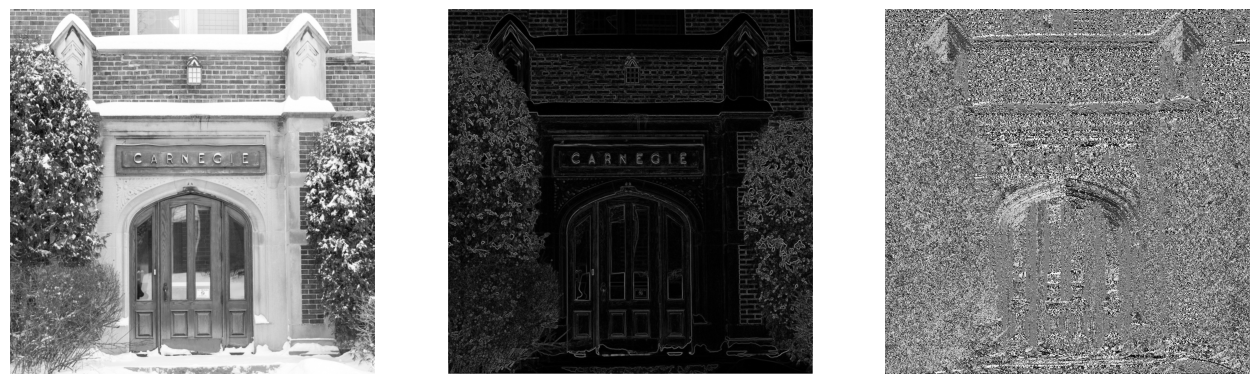

In [17]:
epsilon = 0.000001
m = np.sqrt(out1**2 + out2**2)
d = np.arctan(out2 / (out1+epsilon))

fig,(orig,magnitude,direction)= plt.subplots(ncols=3, figsize=(16, 8))

orig.imshow(image,'gray')
orig.axis('off')

magnitude.imshow(m,'gray')
magnitude.axis('off')

direction.imshow(d,'gray')
direction.axis('off')


<BarContainer object of 9 artists>

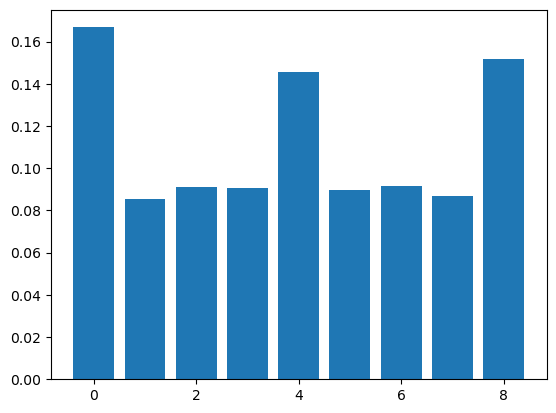

In [18]:
bins = np.zeros(9)
degrees = d *180 / np.pi
bin_no = np.uint8(((degrees + 90)%180) / 20)
for row in range(bin_no.shape[0]):
    for col in range(bin_no.shape[1]):
        bins[bin_no[row,col]] += m[row,col]
bins /= np.sum(bins)        
plt.bar(range(0,9), bins)

In [19]:
# Now put everything together
def ourHOG(image):
    #Find gradients
    if len(image.shape)==3:
        image = np.uint8(color.rgb2gray(image)*255)
        
    image = np.float32(image)
    filt1 = np.array([[0,0,0],[-1,0,1],[0,0,0]])
    filt2 = np.matrix.transpose(filt1)
    out1 = ndi.correlate(image,filt1,mode='constant')
    out2 = ndi.correlate(image,filt2,mode='constant')
    
    #Magnitude and direction
    epsilon = 0.000001
    m = np.sqrt(out1**2 + out2**2)
    d = np.arctan(out2 / (out1+epsilon))
    
    #Weighted histogram of gradients
    bins = np.zeros(9)
    degrees = d *180 / np.pi
    bin_no = np.uint8(((degrees + 90)%180) / 20)
    for row in range(bin_no.shape[0]):
        for col in range(bin_no.shape[1]):
            bins[bin_no[row,col]] += m[row,col]
            
    bins /= np.sum(bins)
    return bins

<BarContainer object of 9 artists>

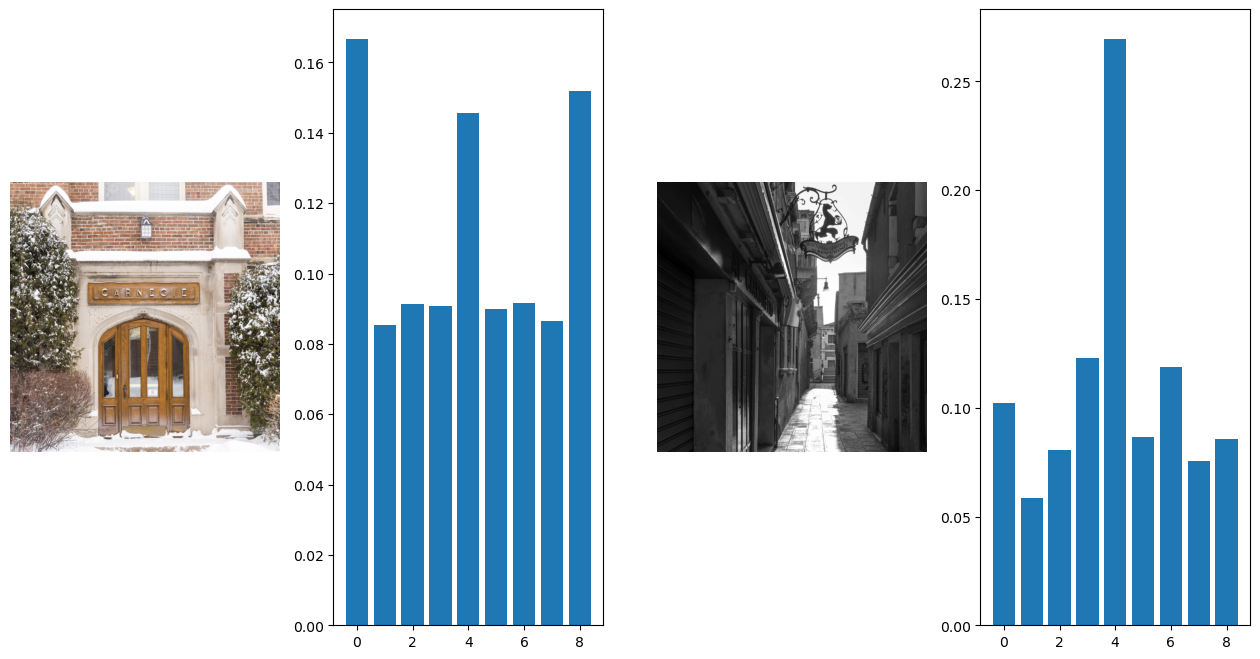

In [21]:
img1 = io.imread(r'..\data\carnegie.jpg')
img2 = io.imread(r'..\data\lane.jpg')
h1 = ourHOG(img1)
h1 /= np.sum(h1)
h2 = ourHOG(img2)
h2 /= np.sum(h2)

fig,(im1,hog1,im2,hog2)= plt.subplots(ncols=4, figsize=(16, 8))

im1.imshow(img1,'gray')
im1.axis('off')

hog1.bar(range(0,9), h1)

im2.imshow(img2,'gray')
im2.axis('off')

hog2.bar(range(0,9), h2)

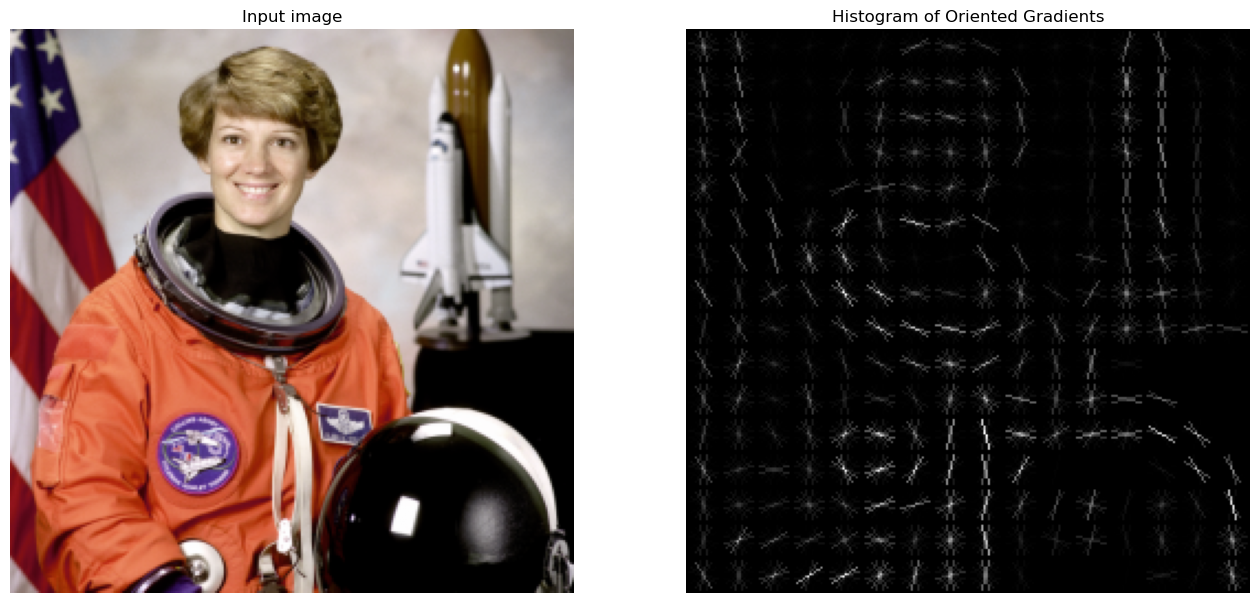

In [25]:
image = data.astronaut()
image = transform.resize(image, [256,256])
fd, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [12]:
fd.shape

(2048,)

In [13]:
image.shape

(256, 256, 3)